# Autoproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [2]:
# importeer libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
from scipy.stats import norm

In [3]:
# importeer dataset
df_cars = pd.read_csv(os.path.join('..', 'data', 'input', 'cars.csv'))

In [4]:
# importeer functies
sys.path.append('../scripts')  # definieer path met scripts
from fuel_mappings import fuel_mapping
from make_a_chart import horizontal_bar_chart

In [5]:
# Maak een kopie van het originele dataframe
original_df = df_cars.copy()

# print(df_cars.sample(3))

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

Antwoord:

**year**: numeriek (meer specifiek: integer)

**fuel_type**: categorisch (meer specifiek: niet-ordinaal, er is geen rangorde tussen deze categorieën)

**seller_rating**: kan zowel numeriek (meer specifiek: float, incl. potentiële NaN's) als categorisch (meer specifiek: ordinaal) geinterpreteerd worden, dit hangt af van de businessvraag.

In [6]:
# lijst van types
print(df_cars.loc[:,['year', 'fuel_type', 'seller_rating']].dtypes)

# enkele sample data
print(df_cars.loc[:,['year', 'fuel_type', 'seller_rating']].sample(3))

year               int64
fuel_type         object
seller_rating    float64
dtype: object
        year fuel_type  seller_rating
43612   2017  Gasoline            NaN
396245  2021  Gasoline            NaN
280321  2019  Gasoline            4.7


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

Antwoord: Zonder gedetailleerd naar de prijzen te kijken is de mediaan de veiligste centrummaat. Bij Vraag 3 kijken we ook naar andere centrummaten.

In [7]:
# Maak dataframe met alleen volvo's voor hergebruik
df_cars_volvo = df_cars[df_cars['manufacturer'] == 'Volvo']

# Bereken mediaan prijs
median_price_volvo = df_cars_volvo['price'].median()
                  
print(f"Mediaanprijs van een 2de hands Volvo: {round(median_price_volvo)}")

Mediaanprijs van een 2de hands Volvo: 36673


In [8]:
# Voor het geval geen Volvo bestaat met mediaanprijs: Zoek Volvo die het dichtst mediaan benadert
volvo_median_price = (df_cars_volvo
                       # trek voor elke rij mediaan af van prijs:
                       .iloc[(df_cars_volvo['price']
                              -median_price_volvo) 
                       .abs()
                       # sorteer op resultaat aftrekking en selecteer laagste resultaatwaarde
                       .argsort()[:1]]   
                      )

volvo_median_price.T

,755471
manufacturer,Volvo
model,XC40 R-Design
year,2020
mileage,35989.0
engine,I-4 cyl
transmission,Automatic with Geartronic
drivetrain,AWD
fuel_type,Gasoline
mpg,NaN
exterior_color,Onyx Black Metallic


In [9]:
# Toon alle Volvo's met mediaan prijs
# volvo_median_price = df_cars[(df_cars['price'] == median_price_volvo)
#                          & (df_cars['manufacturer'] == 'Volvo')]

# volvo_median_price.T

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cumulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [10]:
# Berekening gemiddelde prijs van een 2de hands Volvo
# avg_price_volvo = (df_cars[df_cars['manufacturer'] == 'Volvo']
#                    ['price'].mean()
#                   )

NameError: name 'avg_price_volvo' is not defined

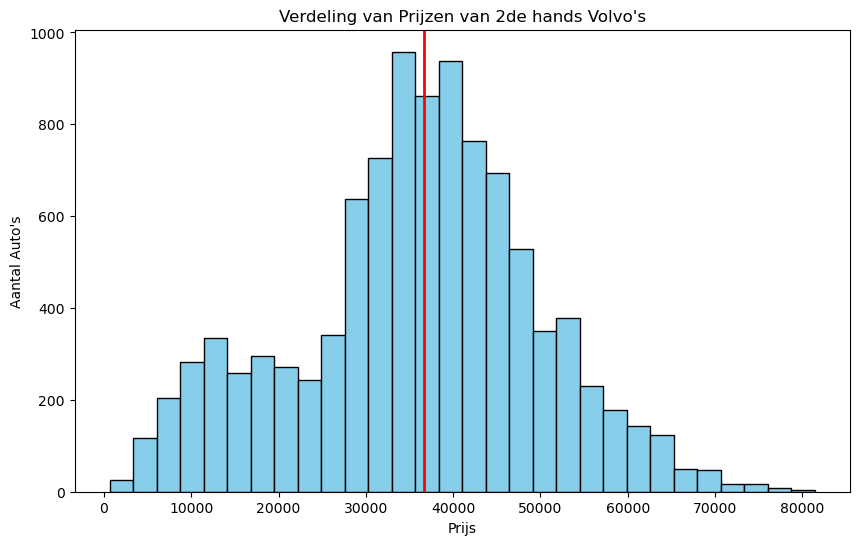

In [11]:
# Histogram van prijzen
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_cars[df_cars['manufacturer'] == 'Volvo']['price'], bins=30, color='skyblue', edgecolor='black')
ax.set_title("Verdeling van Prijzen van 2de hands Volvo's")
ax.set_xlabel('Prijs')
ax.set_ylabel("Aantal Auto's")

# Voeg verticale lijnen toe voor mediaan (rood) en gemiddelde (paars)
ax.axvline(median_price_volvo, color='red', linestyle='solid', linewidth=2, label='Mediaan')
ax.axvline(avg_price_volvo, color='purple', linestyle='solid', linewidth=2, label='Gemiddelde')

# Verwijder lijnen bovenaan en rechts
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Voeg grid toe
ax.grid(True)
plt.show()

Uit de grafiek leiden we af dat de prijsverdeling min of meer symmetrisch is, weliswaar met een iets zwaardere linkerkant. De linkerkant zal maken dat het gemiddelde lager zal zijn dan de mediaan, en dit wordt ook door de berekeningen bevestigd.

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?

Antwoord: Er zijn veel meer 2de hands Volvo's met Gasoline dan met andere brandstoffen. Een vergelijking obv histogrammen (met absolute aantallen) is moeilijk te maken. Laat ons eerst eens kijken van welke brandstoftypes we voldoende data hebben om een inschatting te maken van het aandeel wagens per prijscategorie.

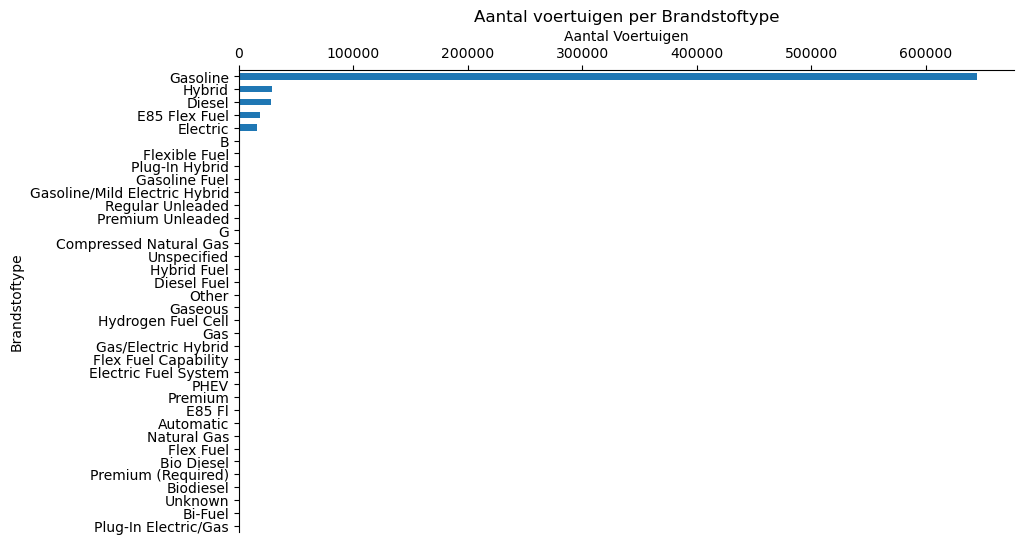

In [12]:
# Use the function to create a horizontal bar chart for the 'fuel_type' column
values_fuel_type = df_cars['fuel_type'].value_counts(ascending=True)
horizontal_bar_chart(values_fuel_type, 
                     'Aantal voertuigen per Brandstoftype', 'Aantal Voertuigen', 'Brandstoftype')

Het lijkt erop dat niet elke wagen binnen 1 van de hoofdcategorieën werd geclassificeerd. Om een idee te krijgen van de grootte van het probleem, berekenen we het aandeel 'verkeerde' registraties:

In [13]:
# Bereken het totale aantal voertuigen
total_vehicles = df_cars['fuel_type'].count()

# Selecteer de top 5 hoofdcategorieën
top_5_categories = values_fuel_type.nlargest(5)

# Bereken het aandeel van elk van de 5 hoofdcategorieën
share_of_categories = (top_5_categories / total_vehicles) * 100

print("Aandeel van elk van de 5 hoofdcategorieën:")
print(share_of_categories)

# Bereken de som van de aandelen van de eerste 5 categorieën
sum_of_top_5_categories = share_of_categories.sum()

print("Som van de aandelen van de eerste 5 categorieën:", round(sum_of_top_5_categories, 2), "%")

Aandeel van elk van de 5 hoofdcategorieën:
fuel_type
Gasoline         87.212581
Hybrid            3.942427
Diesel            3.783599
E85 Flex Fuel     2.539626
Electric          2.190583
Name: count, dtype: float64
Som van de aandelen van de eerste 5 categorieën: 99.67 %


We concluderen hieruit dat het aantal voertuigen met 'verkeerde' info over brandstoftype verwaarloosbaar klein is. We verfijnen het veld fuel_type door een categorisatie te maken. De groep met verkeerde info over brandstoftype 'Other' nemen we niet mee in de rest van onze analyse.

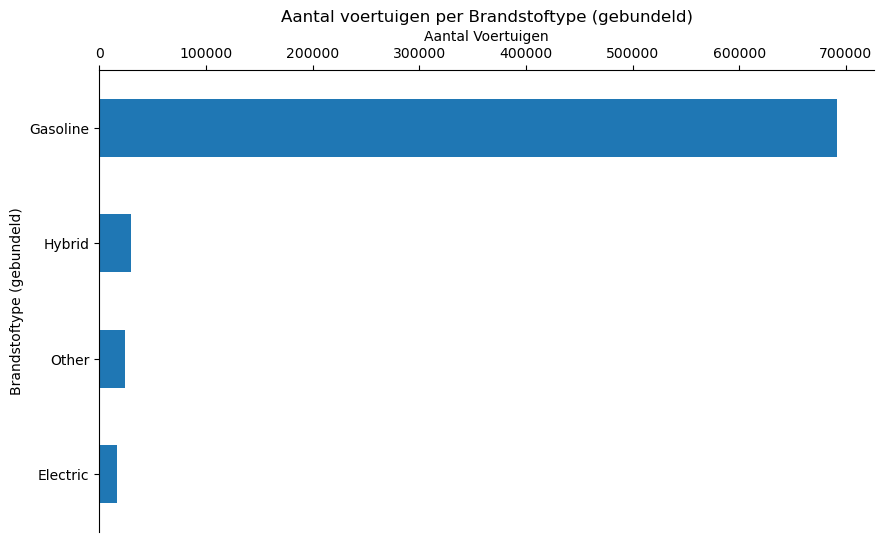

In [14]:
values_mapped_fuel_type = df_cars['fuel_type'].map(fuel_mapping).value_counts(ascending=True)
horizontal_bar_chart(values_mapped_fuel_type, 'Aantal voertuigen per Brandstoftype (gebundeld)', 'Aantal Voertuigen', 'Brandstoftype (gebundeld)')

In [15]:
# Filter out rows where the mapped fuel type is 'Other'
df_cars = df_cars[df_cars['fuel_type'].map(fuel_mapping) != 'Other']

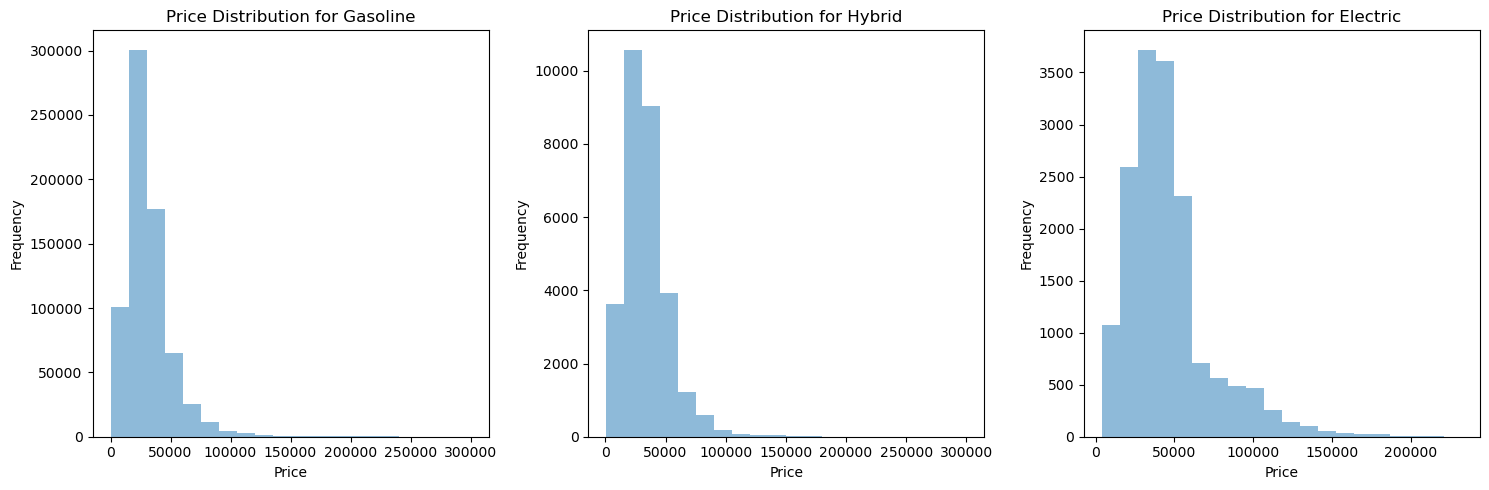

In [20]:
# Create a new DataFrame with mapped fuel types
df_cars['mapped_fuel_type'] = df_cars['fuel_type'].map(fuel_mapping)

# Filter out outliers with price > 300,000
df_filtered = df_cars[df_cars['price'] <= 300000]

# Exclude 'nan' mapped fuel type
df_filtered = df_filtered.dropna(subset=['mapped_fuel_type'])

# Get unique mapped fuel types from the filtered DataFrame, excluding 'nan'
unique_mapped_fuel_types = df_filtered['mapped_fuel_type'].unique()
unique_mapped_fuel_types = [fuel_type for fuel_type in unique_mapped_fuel_types if fuel_type != 'nan']

# Calculate the number of rows and columns for subplots
num_rows = len(unique_mapped_fuel_types) // 2
num_cols = 2 if len(unique_mapped_fuel_types) % 2 == 0 else 3

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Ensure axs is a 1D array
axs = axs.flatten()

# Plot histograms for each mapped fuel type
for i, mapped_fuel_type in enumerate(unique_mapped_fuel_types):
    fuel_data = df_filtered[df_filtered['mapped_fuel_type'] == mapped_fuel_type]
    ax = axs[i]
    ax.hist(fuel_data['price'].dropna(), bins=20, alpha=0.5)
    ax.set_title(f'Price Distribution for {mapped_fuel_type}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

De schaling op de y-as is sterk verschillend, omdat er veel meer voertuigen in de database zijn met Gasoline als brandstof dan dat er voertuigen zijn met andere brandstoffen. Een densityplot is een betere manier om deze 3 categorieën te vergelijken, omdat bij een densityplot de oppervlakte onder elke curve steeds gelijk is aan 1. 

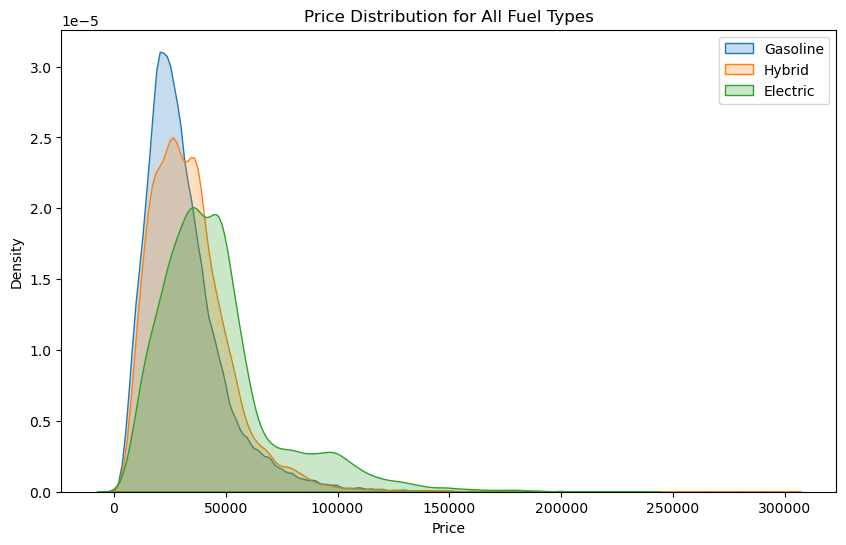

In [21]:
# Plot the KDE of price distribution for all fuel types
plt.figure(figsize=(10, 6))
for fuel_type in unique_mapped_fuel_types:
    fuel_data = df_filtered[df_filtered['mapped_fuel_type'] == fuel_type]
    sns.kdeplot(fuel_data['price'].dropna(), label=fuel_type, fill=True)

plt.title('Price Distribution for All Fuel Types')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

Antwoord:
- waar: de afstand min-max is groter bij benzinewagens, vergeleken met electrische wagens
- niet te besluiten: boxplots geven geen informatie over het aantal elektrische wagens vergeleken met het aantal benzinewagens
- waar: Bij benzinewagens ligt 75ste percentiel ongeveer op 50 000 euro. Bij elektrische wagens ligt mediaan net onder 50 000 euro, wat betekent dat iets minder dan de helft van de wagens meer kosten. Bij benzine ligt 75ste percentiel ongeveer op 50 000, waardoor het aandeel benzinewagens +50 000 minder zal zijn dan het aandeel elektrische wagens +50 000.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

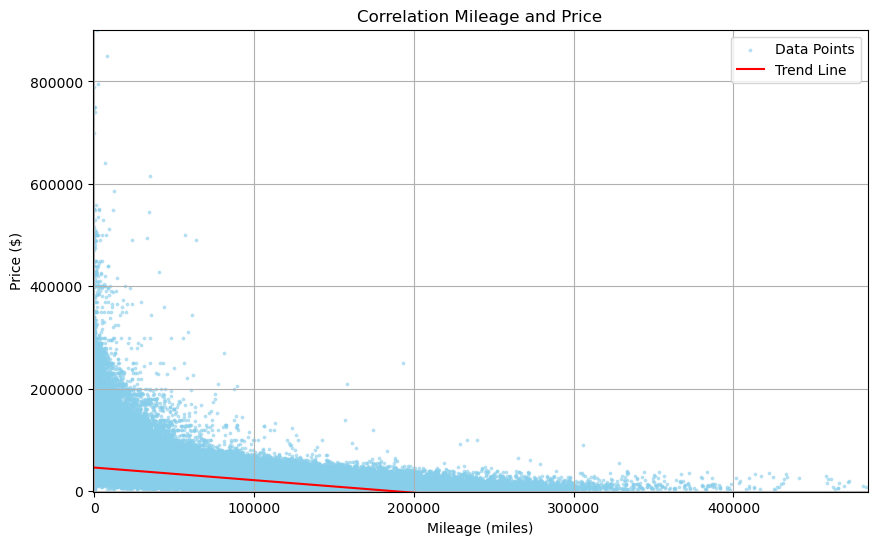

In [22]:
# Filter outliers op vlak van prijs en mileage weg. Deze nemen we niet mee in rest van de analyse
df_cars = df_cars[df_cars.price < 1000000]
df_cars = df_cars[df_cars.mileage < 500000]

# Creëer scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cars.mileage, df_cars.price, color='skyblue', label='Data Points', s=3, alpha=0.5)

# Voeg labels en titel toe
plt.title('Correlation Mileage and Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')

# Voeg trendlijn toe
z = np.polyfit(df_cars.mileage, df_cars.price, 1)
p = np.poly1d(z)
#plt.plot(mileage, p(mileage), color='red', label='Trend Line')  # ik had de 2 regels code hieronder nodig om dit draaiende te krijgen...
mileage_range = np.linspace(np.min(df_cars.mileage), np.max(df_cars.mileage), 100)  # Generate a range of mileage values for the trend line
plt.plot(mileage_range, p(mileage_range), color='red', label='Trend Line')  # Use mileage_range instead of undefined mileage

# Voeg limieten voor x en y assen op basis van de datarange
plt.xlim(np.min(df_cars.mileage) - 1000, np.max(df_cars.mileage) + 1000)
plt.ylim(np.min(df_cars.price) - 1000, np.max(df_cars.price) + 1000)


# Voeg legende toe
plt.legend()

plt.grid(True)
plt.show()

We zien een zeer diffuus beeld. Het vermoeden is dat de prijs en de verhouding sterk afhangt van het automerk. En dat blijkt uit onderstaande tabel ook het geval.

In [23]:
# Compute average price and count per manufacturer
manufacturer_stats = df_cars.groupby('manufacturer')['price'].agg(['mean', 'count']).sort_values(by=['mean', 'count'], ascending=[False, False]).reset_index()

# Round the average price and convert to integer
manufacturer_stats['mean'] = manufacturer_stats['mean'].round().astype(int)

# Rename columns for clarity
manufacturer_stats.columns = ['Manufacturer', 'Average Price', 'Count']

# Order by prices in descending order
manufacturer_stats = manufacturer_stats.sort_values(by='Average Price', ascending=False)

# Display the DataFrame
print(manufacturer_stats)

     Manufacturer  Average Price  Count
0         Porsche          84224  10629
1      Land Rover          52894  12162
2           Tesla          49081   5873
3   Mercedes-Benz          47726  40602
4             RAM          43921  19312
5             GMC          40120  29218
6        Cadillac          38742  16468
7             BMW          37213  35121
8            Audi          36654  17836
9           Volvo          35799  10006
10        Lincoln          35041  10525
11         Jaguar          34828   3407
12          Lexus          34470  21274
13           Ford          33150  75868
14      Chevrolet          31243  54564
15           Jeep          31229  41600
16         Toyota          29952  57878
17       INFINITI          29863  11715
18          Acura          28522   7609
19          Dodge          27553  23870
20         Subaru          24803  23604
21          Honda          24677  35950
22     Volkswagen          23382  23098
23          Buick          23332  14028


We kunnen per merk inzoomen op het verband tussen Price en Mileage. Zoals verwacht zien we voor elk merk een **negatieve correlatie**: Hoe meer kilometer er met een auto gereden werd, hoe minder die auto in het algemeen waard is. We werken in onderstaande afbeeldingen met slechts 10% van de data, owv de lange rekentijd. We gebruiken bij elke grafiek dezelfde schaal zodat we ze onderling kunnen vergelijken.

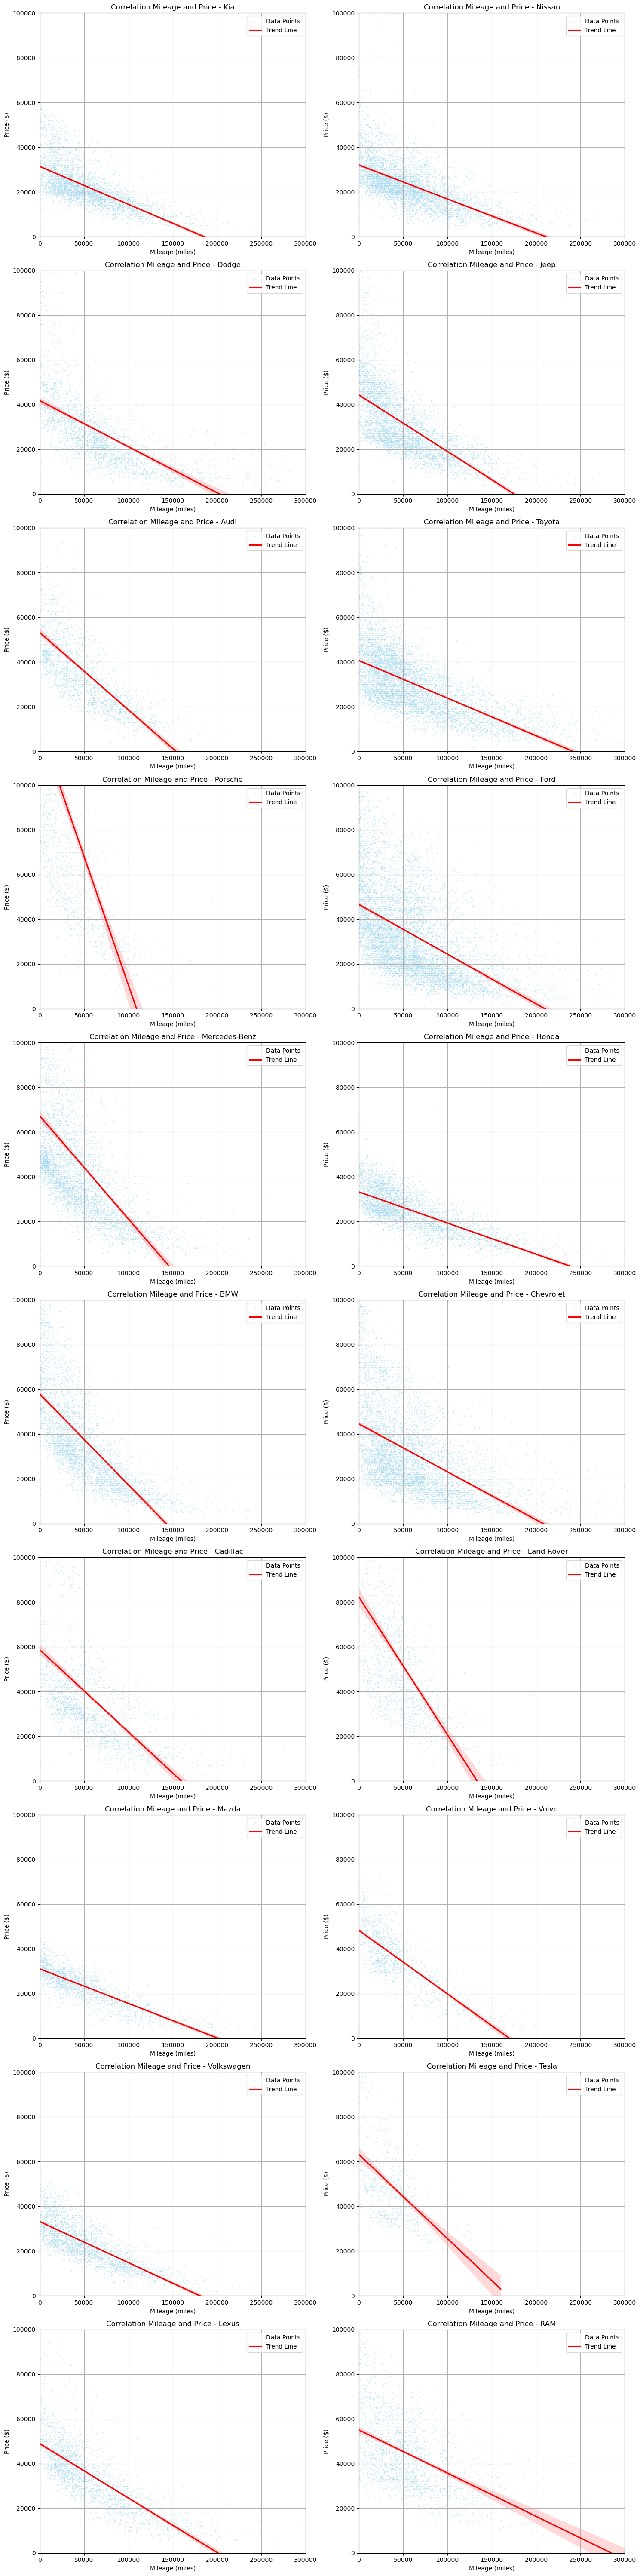

In [24]:
df_cars_sample = df_cars.sample(frac=0.1, random_state=42)

# Get unique manufacturers
manufacturers = df_cars_sample['manufacturer'].unique()

# Calculate the number of rows needed for the subplot grid
num_rows = (len(manufacturers) + 2) // 3  # Round up the division result

# Create subplots for each manufacturer
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6 * num_rows))

# Flatten the axes array to iterate over all subplots
axes_flat = axes.flatten()

for ax, manufacturer in zip(axes_flat, manufacturers):
    # Filter data for the current manufacturer
    df_manufacturer = df_cars_sample[df_cars_sample['manufacturer'] == manufacturer]
    
    # Create scatter plot with trend line using Seaborn
    sns.scatterplot(x='mileage', y='price', data=df_manufacturer, ax=ax, color='skyblue', label='Data Points', s=3, alpha=0.5)
    sns.regplot(x='mileage', y='price', data=df_manufacturer, ax=ax, scatter=False, color='red', label='Trend Line')

    # Add labels and title
    ax.set_title(f'Correlation Mileage and Price - {manufacturer}')
    ax.set_xlabel('Mileage (miles)')
    ax.set_ylabel('Price ($)')

    # Set limits for x and y axes to include 0
    ax.set_xlim(left=0, right=300000)
    ax.set_ylim(bottom=0, top=100000)

    # Add legend
    ax.legend()

    ax.grid(True)

# Remove any unused subplots
for i in range(len(manufacturers), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

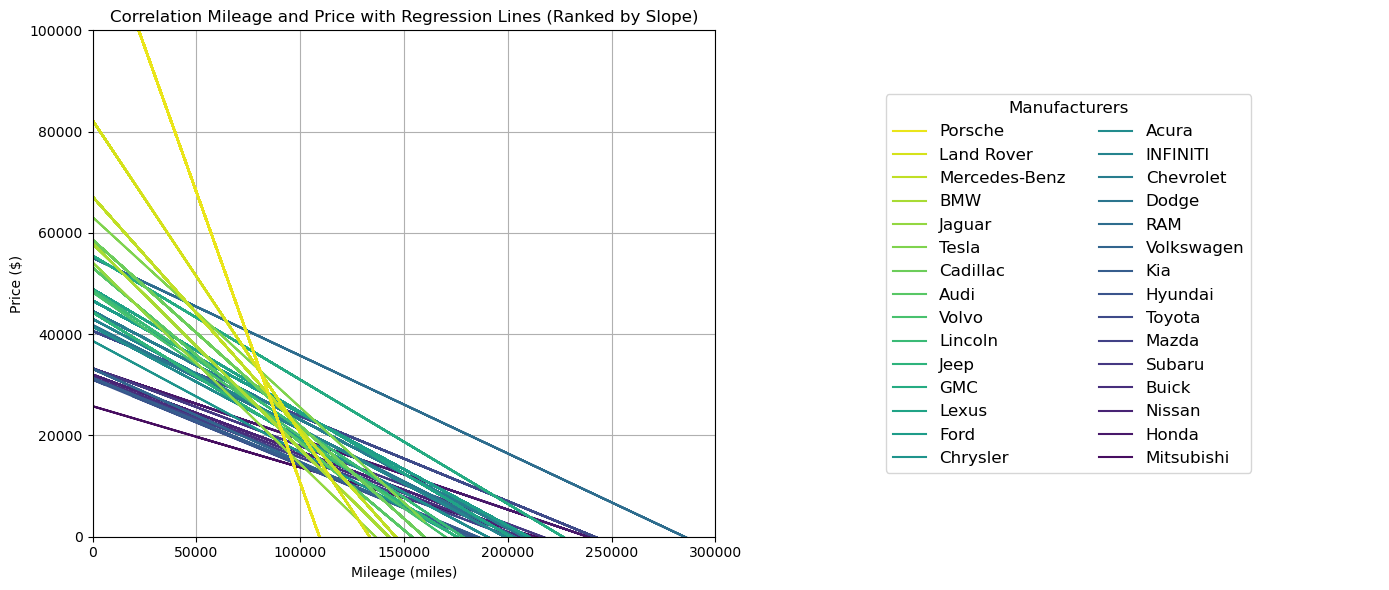

In [25]:
# Filter outliers on price and mileage
df_cars_sample = df_cars.sample(frac=0.1, random_state=42)
df_cars_sample = df_cars_sample[df_cars_sample.price < 1000000]
df_cars_sample = df_cars_sample[df_cars_sample.mileage < 500000]

# Get unique manufacturers
manufacturers = df_cars_sample['manufacturer'].unique()

# Calculate slopes for each manufacturer
slopes = {}
for manufacturer in manufacturers:
    df_manufacturer = df_cars_sample[df_cars_sample['manufacturer'] == manufacturer]
    X = df_manufacturer['mileage']
    y = df_manufacturer['price']
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    slopes[manufacturer] = slope

# Sort manufacturers by slope
sorted_manufacturers = sorted(manufacturers, key=lambda x: slopes[x], reverse=True)

# Create scatter plot for all data points
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Assign colors based on rank
colors = sns.color_palette('viridis', len(sorted_manufacturers))

for i, manufacturer in enumerate(sorted_manufacturers):
    # Filter data for the current manufacturer
    df_manufacturer = df_cars_sample[df_cars_sample['manufacturer'] == manufacturer]
    
    # Calculate regression line coefficients
    X = df_manufacturer['mileage']
    y = df_manufacturer['price']
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    intercept = y_mean - slope * X_mean
    
    # Generate regression line values
    regression_line = slope * X + intercept
    
    # Plot regression line with label and color
    if i == 0:
        axs[0].plot(X, regression_line, label=manufacturer, color=colors[i])
    else:
        axs[0].plot(X, regression_line, label=manufacturer, color=colors[i])

# Add labels and title for the first subplot
axs[0].set_title('Correlation Mileage and Price with Regression Lines (Ranked by Slope)')
axs[0].set_xlabel('Mileage (miles)')
axs[0].set_ylabel('Price ($)')
axs[0].set_xlim(left=0, right=300000)
axs[0].set_ylim(bottom=0, top=100000)
axs[0].grid(True)

# Add legend in the second subplot
handles, labels = axs[0].get_legend_handles_labels()
legend = axs[1].legend(reversed(handles), reversed(labels), fontsize='large', loc='center', bbox_to_anchor=(0.5, 0.5), ncol=2)
legend.set_title('Manufacturers', prop={'size': 'large'})

# Hide the axes in the second subplot
axs[1].axis('off')

plt.tight_layout()
plt.show()

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

Antwoord: een standaarddeviatie van 4,162.03 euro geeft aan dat de prijzen van de elektrische tweedehands Volvo's gemiddeld ongeveer 4,162.03 euro afwijken van het gemiddelde van 48,788.39 euro. Op basis van het berekende betrouwbaarheidsinterval kunnen we met 95% zekerheid zeggen dat het werkelijke gemiddelde van alle elektrische tweedehands Volvo's ergens tussen de 48,275.54 euro en 49,301.24 euro ligt.

In [26]:
# Filter de dataset op fuel_type 'electric'
df_electric_volvo = df_cars_volvo[df_cars_volvo['fuel_type'] == 'Electric']

# Bereken het gemiddelde en de standaarddeviatie van de prijzen
gemiddelde_prijs = df_electric_volvo['price'].mean()
standaarddeviatie = df_electric_volvo['price'].std()

print(f"Geschatte gemiddelde prijs van elektrische tweedehands Volvo's: {gemiddelde_prijs} euro")
print(f"Standaarddeviatie: {standaarddeviatie}")

# Bereken het betrouwbaarheidsinterval met 95% betrouwbaarheid
z_score = norm.ppf(0.975)  # Z-score voor 95% betrouwbaarheid
n = len(df_electric_volvo)
betrouwbaarheidsinterval = z_score * (standaarddeviatie / np.sqrt(n))
ondergrens = gemiddelde_prijs - betrouwbaarheidsinterval
bovengrens = gemiddelde_prijs + betrouwbaarheidsinterval

print(f"Betrouwbaarheidsinterval (95%): ({ondergrens}, {bovengrens})")

Geschatte gemiddelde prijs van elektrische tweedehands Volvo's: 48788.391304347824 euro
Standaarddeviatie: 4162.028740786209
Betrouwbaarheidsinterval (95%): (48275.53829843574, 49301.244310259906)
